# Assigment 1 Python

- Name : Ahmad Firdaus Zulva
- Code ID : PYTN-KS04-001
- Course Introduction to Python for Data Science

## Overview about Projects
Proyek tugas pertama dalam kegiatan Studi Independen MSIB 2 di kelas Introduction to Python for Data Science. Proyek ini bertujuan untuk menunjukkan berbagai hasil visualisasi dari analisis data kejahatan yang terjadi di London, Inggris pada tahun 2008-2016. 

## Import Required Libraries

In [78]:
#kepentingan mengolah data
import numpy as np
import pandas as pd
#kepentingan membuat plot
import matplotlib as mpl
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns
#kepentingan membuat map
import folium

## Using Dataset

Dataset yang digunakan untuk tugas ini adalah data kriminalitas pada daerah London di tahun 2008 hingga 2016. Data ini didapatkan pada situs kaggle.com .  Data ini berisi 

1. lsoa_code = kode area polisi
2. borough = wilayah kota London yang terkait dengan data statistik
3. major_category = kategori kejahatan mayor
4. minor_category = kategori kejahatan minor
6. value = jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu
6. year = tahun kejadian
7. month = bulan kejadian

Dataset ini berisikan 13.490.604 rows dan 7 columns

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 720B-E28B

 Directory of C:\Users\Asus-X550Z

20/03/2022  11:52    <DIR>          .
20/03/2022  11:52    <DIR>          ..
17/03/2022  16:23               977 .bash_history
17/03/2022  08:34    <DIR>          .conda
14/02/2022  12:37                25 .condarc
14/02/2022  12:36    <DIR>          .continuum
19/02/2022  18:58                53 .git-for-windows-updater
18/02/2022  15:59                53 .gitconfig
05/03/2021  17:23    <DIR>          .gstreamer-0.10
08/02/2022  09:02    <DIR>          .idlerc
18/03/2022  13:02    <DIR>          .ipynb_checkpoints
14/02/2022  10:57    <DIR>          .ipython
17/02/2022  18:59    <DIR>          .jupyter
20/02/2022  11:02                20 .lesshst
03/06/2021  19:26    <DIR>          .maplesoft
17/02/2022  19:15    <DIR>          .matplotlib
16/03/2022  22:53                27 .python_history
20/10/2021  15:55    <DIR>          .spss
08/02/2022  09:09    <DIR>          .vscode
06/12/2

In [3]:
missing_values=['NA','--','n/a','na'] # mendeteksi missing vaulues
df_crimlon=pd.read_csv('london_crime_by_lsoa.csv', na_values=missing_values)

## Preprocessing Dataset Before Visualization

Kita akan mengolah terlebih dahulu dataset yang telah kita read. Beberapa proses yang kita akan lakukan adalah 

1. Mengubah nama kolom yang berbahasa Inggris menjadi Bahasa Indonesia
2. Mengetahui tipe data, dimensi data, fitur/atribut dari dataset
3. Mencari tahu missing values dan menyelesaikan jika terdapat missing values

In [4]:
df_crimlon.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [5]:
df_crimlon.shape

(13490604, 7)

In [6]:
#kita akan mengubah nama kolom dataset yang berbahasa inggris menjadi

df_crimlon=df_crimlon.rename(columns={'lsoa_code':'kode polisi',
                                     'borough':'wilayah',
                                     'major_category':'kategori_mayor',
                                     'minor_category':'kategori_minor',
                                     'year':'tahun',
                                     'month':'bulan',
                                      'value':'jumlah kasus'}, )

In [7]:
df_crimlon.head(3)

kode polisi    wilayah               kategori_mayor  \
0   E01001116    Croydon                     Burglary   
1   E01001646  Greenwich  Violence Against the Person   
2   E01000677    Bromley  Violence Against the Person   

                kategori_minor  jumlah kasus  tahun  bulan  
0  Burglary in Other Buildings             0   2016     11  
1               Other violence             0   2016     11  
2               Other violence             0   2015      5

In [8]:
#menampilkan daftar nama kolom pada data
columns=df_crimlon.columns
columns

Index(['kode polisi', 'wilayah', 'kategori_mayor', 'kategori_minor',
       'jumlah kasus', 'tahun', 'bulan'],
      dtype='object')

In [9]:
df_crimlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   kode polisi     object
 1   wilayah         object
 2   kategori_mayor  object
 3   kategori_minor  object
 4   jumlah kasus    int64 
 5   tahun           int64 
 6   bulan           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Karena data kriminal terdapat sekitar 13.490.604 data dimana pasti terdapat nilai ganda pada data tersebut maka kita akan identifikasi nilai unique pada dataset tersebut 

In [10]:
df_crimlon.isnull().sum()  # mencari tahu ada tidaknya standart missing values atau unstandart missing values

kode polisi       0
wilayah           0
kategori_mayor    0
kategori_minor    0
jumlah kasus      0
tahun             0
bulan             0
dtype: int64

In [11]:
df_crimlon['wilayah'].unique() # mencari nilai pada kolom wilayah

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [12]:
df_crimlon['kategori_minor'].unique() # mencari macam macam kejahatan minor yang terjadi

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [13]:
df_crimlon['kategori_mayor'].unique() # mencari macam macam kejahatan major yang terjadi

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [14]:
df_crimlon['tahun'].unique() # mencari tahun kejadian 

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [15]:
df_crimlon['bulan'].unique()

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2], dtype=int64)

In [16]:
df_crimlon['jumlah kasus'].unique() # mencari jumlah kasus yang terjadi

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
         8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,
        21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,
        40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,
        51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55,
        81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,
       241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86,
        52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98,
        92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,
       131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,
       144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,
        85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,
       129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,
       244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 13

Berdasarkan preprocessing yang telah kita lakukan, beberapa kolom terdapat data yang bertipe data string dan juga terdapat beberapa kolom yang bertipe data integer. Dari semua kolom yang kita lakukan preprocessing tidak terdapat missing values baik itu standart, unstandart, maupun unexpected missing values.

## Making new DataFrame 
Kita membuat dataframe baru untuk membuat visualisasi yang kita inginkan.

### Dataframe untuk mencari tahu 5 wilayah kejahatan terbanyak

In [17]:
# mengambil data yang memiliki jumlah kejahatan tidak sama dengan 0 dan mengurutkanya
df1=df_crimlon[df_crimlon['jumlah kasus']!=0]
df1=df1.groupby('wilayah')['jumlah kasus'].sum().sort_values()
df1

wilayah
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

### DataFrame untuk total kejahatan di setiap tahun

In [48]:
data={}
years = list(map(int,np.sort(df_crimlon['tahun'].unique()))) #membuat list tahun
major_categories = list(df_crimlon['kategori_mayor'].unique())#membuat list kejahatan kategori mayor
data = {}
for year in years:
    # mengambil semua data pada setiap tahun,lalu grouping berdasarkan 'Kejahatan kategori mayor',dan menjumlahnya
    mcat_tahun = df_crimlon[
        df_crimlon['tahun'] == year
    ].groupby('kategori_mayor')['jumlah kasus'].sum()
    
    # menyiapkan Series 
    data[year] = pd.Series(
        data=map(int, mcat_tahun.reset_index()['jumlah kasus'].values),
        index=mcat_tahun.index
    )

# Membuat dataframe 
df2 = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data
)
df2['Total'] = df2[years].sum(axis=1)

# urutkan data berdasarkan Total dari tinggi ke rendah
df2.sort_values(by='Total', ascending=False, inplace=True)

In [49]:
df2

2008    2009    2010    2011    2012    2013  \
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Drugs                         68804   60549   58674   57550   51776   50278   
Robbery                       29627   29568   32341   36679   35260   29337   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Fraud or Forgery               5325       0       0       0       0       0   
Sexual Offences                1273       0       0       0       0       0   

                               2014    2015    2016    Total  
Theft and Handling           279880  284022  294133  2661861  
Violence Against the Person  185349  218740  232381  1558081  
Burglary                      76053   70489   68285   754293  
Criminal Damage               59279   62976   64071   630938  
Drugs                         44435   39785   38914   470765  
Robbery                       22150   21383   22528   258873  
Other Notifiable Offences     13037   14229   15809   106349  
Fraud or Forgery                  0       0       0     5325  
Sexual Offences                   0       0       0     1273

In [20]:
data={}
years = list(map(int,np.sort(df_crimlon['tahun'].unique())))   #membuat list tahun
minor_categories = list(df_crimlon['kategori_minor'].unique())   #membuat list kejahatan kategori minor
data = {}
for year in years:
    # mengambil semua data pada setiap tahun,lalu grouping berdasarkan 'Kejahatan kategori minor',dan menjumlahnya
    mincat_tahun = df_crimlon[
        df_crimlon['tahun'] == year
    ].groupby('kategori_minor')['jumlah kasus'].sum()
    
    # menyiapkan Series 
    data[year] = pd.Series(
        data=map(int, mincat_tahun.reset_index()['jumlah kasus'].values),
        index=mincat_tahun.index
    )

# Membuat dataframe 
df5 = pd.DataFrame(
    columns=years,
    index=minor_categories,
    data=data
)
df5['Total'] = df5[years].sum(axis=1)

# urutkan data berdasarkan Total dari tinggi ke rendah
df5.sort_values(by='Total', ascending=False, inplace=True)

In [21]:
df5.head(5)

2008   2009    2010    2011    2012    2013  \
Other Theft               99280  95424  103997  113616  132056  115757   
Theft From Motor Vehicle  76570  68856   69709   69604   68198   63509   
Burglary in a Dwelling    56655  60185   57123   62439   61716   56537   
Harassment                43389  43594   42808   37493   43396   41805   
Assault with Injury       56586  55297   54173   50768   50369   39929   

                            2014    2015    2016   Total  
Other Theft               108577  107571  103807  980085  
Theft From Motor Vehicle   52167   50024   51319  569956  
Burglary in a Dwelling     48975   44656   42996  491282  
Harassment                 55330   71633   78676  458124  
Assault with Injury        45677   48164   50038  451001

### DataFrame untuk kasus kejahatan tiap tahun dan tiap bulan

In [22]:
data = {}
for year in years:
    # Ambil semua data pada setiap tahun, grouping berdasarkan bulan, lalu menjumlahkannya
    crim_ym = df_crimlon[
        (df_crimlon['tahun'] == year)
    ].groupby('bulan')['jumlah kasus'].sum()
    
    # membuat series
    data[year] = pd.Series(
        data=map(int, crim_ym.reset_index()['jumlah kasus'].values),
        index=crim_ym.index
    )
# Membuat dataframe dengan index bulan
df3 = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)
df3['Total'] = df3[years].sum(axis=1)
# rename index dengan nama bulan 
bulan_name = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Des']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = bulan_name[i-1]
df3.rename(index=dict_index,inplace=True)

In [23]:
df3

2008   2009   2010   2011   2012   2013   2014   2015   2016   Total
Jan  65419  59142  54934  57966  62436  58933  55515  57055  58847  530247
Feb  62626  54706  55069  54895  56735  55271  51222  53316  56697  500537
Mar  61343  63482  63629  61282  67537  57590  57669  60096  59167  551795
Apr  59640  59181  60085  58714  58801  55678  53467  56445  58637  520648
Mei  62587  62897  62126  62630  64344  56765  56327  61038  63990  552704
Jun  62290  63116  62632  61822  62281  56839  57039  60760  62262  549041
Jul  64126  63281  63764  62428  63280  60508  58564  61606  65519  563076
Aug  59959  58695  59040  59117  62143  57467  55641  58056  62666  532784
Sep  58414  57847  59731  58640  56912  54924  56933  57564  61412  522377
Oct  63354  61176  62113  63622  61728  59956  60537  62361  63405  558252
Nov  61395  59456  60665  64119  62514  58267  59704  62487  61064  549671
Des  57488  54235  51536  59680  58618  54209  57565  60840  62455  516626

### DataFrame untuk total kasus kejahatan tiap wilayah pertahun

In [24]:
data = {}
daerah = list(df_crimlon['wilayah'].unique()) ## membuat list wilayah

for year in years:
    # Ambil semua data pada tiap tahun, grouping berdasarkan wilayah, dan menjumlahkannya
    wil_tahun = df_crimlon[
        df_crimlon['tahun'] == year
    ].groupby('wilayah')['jumlah kasus'].sum()
    
    # membuat series
    data[year] = pd.Series(
        data=map(int, wil_tahun.reset_index()['jumlah kasus'].values),
        index=wil_tahun.index
    )

# Membuat dataframe 
df4 = pd.DataFrame(
    columns=years,
    index=daerah,
    data=data
)
df4['Total'] = df4[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df4.sort_values(by='Total', ascending=False, inplace=True)

In [25]:
df4.head(3)

2008   2009   2010   2011   2012   2013   2014   2015   2016  \
Westminster  47846  48456  48116  54243  59226  53852  47564  47395  48330   
Lambeth      31717  31225  31671  33224  33473  31868  31765  33164  34071   
Southwark    33470  30623  31320  30723  30737  31128  28912  30260  31636   

              Total  
Westminster  455028  
Lambeth      292178  
Southwark    278809

## Visualization
dalam bagian ini kita akan memvisualisasi data yang telah kita olah guna mempermudah analisis kita. beberapa pernyataan yang dapat kita visualisasi sebagai berikut :
1. Wilayah manakah yang memiliki tingkat kejahatan paling tinggi pada tahun 2008-2016?
2. Bagaimana tingkat kejahatan yang terjadi pada London 2008-2016?
3. Jenis Kejahatan apakah yang paling sering terjadi ?

### Question 1 
Wilayah manakah yang memilikitingkat kejahatan paling tinggi pada tahun 2008-2016?

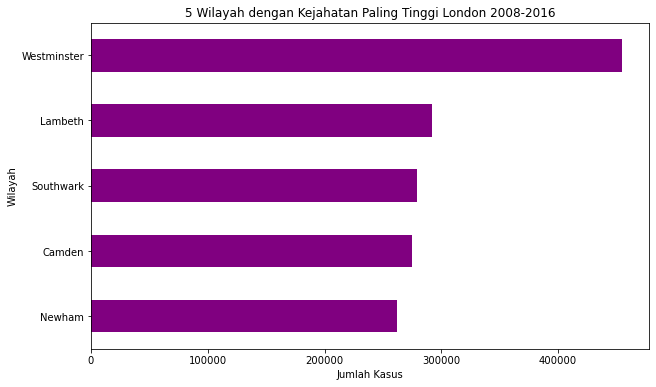

In [26]:
df1.tail().plot(kind='barh', figsize=(10,6), color='purple')
plt.title('5 Wilayah dengan Kejahatan Paling Tinggi London 2008-2016') 
plt.ylabel('')                                                             
plt.xlabel('Jumlah Kasus')
plt.ylabel('Wilayah')
plt.show() 

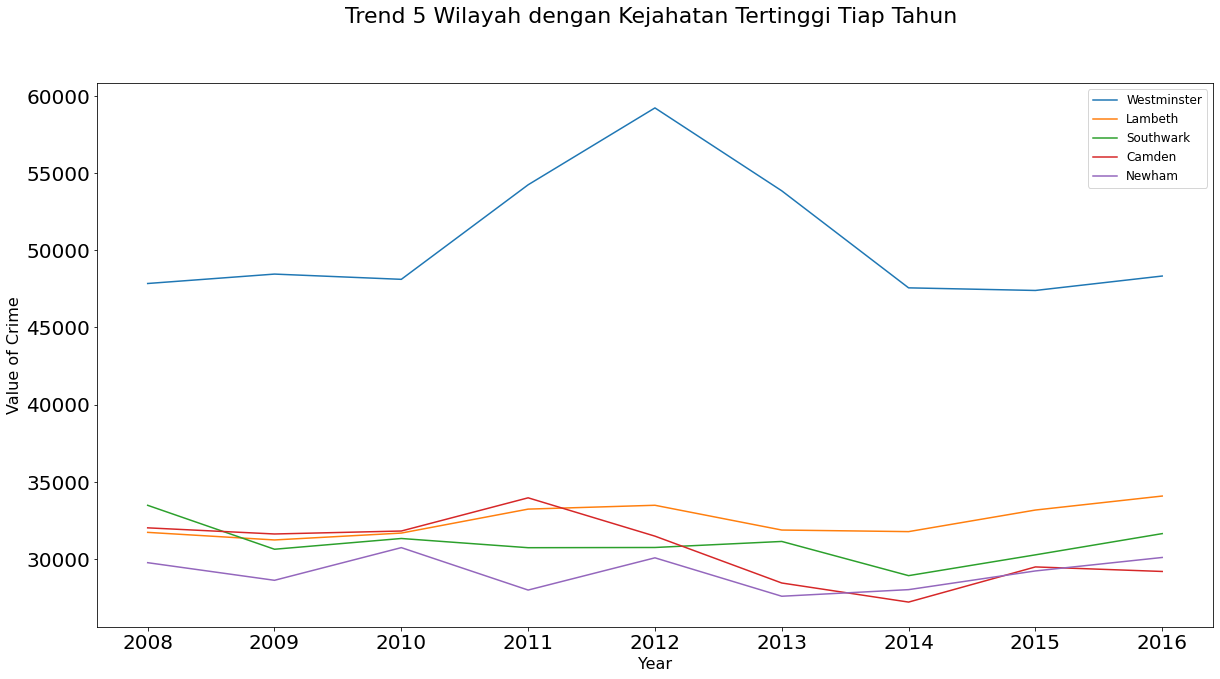

In [27]:
df4[years].head().T.plot(figsize=(20, 10))
plt.xlabel('Year',fontsize=16)
plt.ylabel('Value of Crime', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Trend 5 Wilayah dengan Kejahatan Tertinggi Tiap Tahun ', fontsize=22, y=1.1)
plt.legend(fontsize=12,loc='best')
plt.show()

Dari grafik diatas, kita bisa mengetahui wilayah mana saya yang memiliki tingkat kejahatan paling tinnggi di Kota London. Dalam periode 2008-2016, tercatat wilayah Westmister penyumbang jumlah kasus kejahatan paling besar diantara kota lain. Tercatat jumlah kasus kejahatan yang terjadi sekitar 455.028 kasus. Westmister merupakan wilayah yang paling sering dikunjungi oleh wisatawan karena daya tarik pertunjukan dan tempat (bangunan landmark) yang terkenal didunia. Westminster juga menjadi central city London. Menurut CrimeGrade.org, Westminster mendapat grade C untuk tingkat keamanan karena seringnya kriminalitas disana. Hal ini mungkin terjadi karena banyaknya wisatawan dari mancanegara sehingga memancing peningkatan angka kriminalitas apabila tingkat keamanan juga tidak ditingkatkan. Lambeth, Southwark, Camden, Newham mengikuti setelah Westminster untuk angka kasus kriminalitasnya.

### Question 2
Bagaimana tingkat kejahatan yang terjadi pada London 2008-2016?

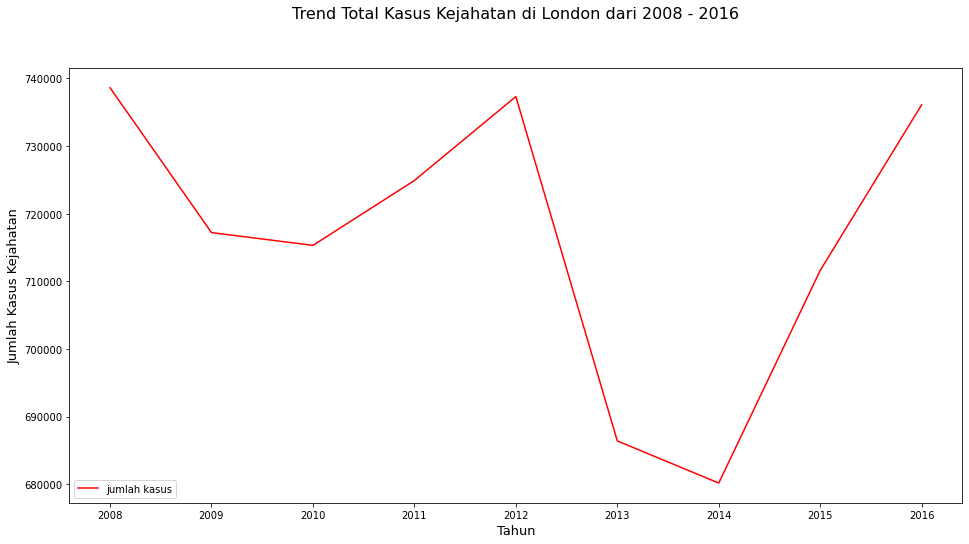

In [28]:
df_crimlon[['jumlah kasus', 'tahun']].groupby(by='tahun').sum().plot(figsize=(16, 8),color='red')
plt.xlabel('Tahun', fontsize=13)
plt.ylabel('Jumlah Kasus Kejahatan', fontsize=13)
plt.title('Trend Total Kasus Kejahatan di London dari 2008 - 2016', y=1.1,fontsize=16)
plt.legend(loc='lower left')
plt.show()

Grafik diatas menunjukkan adanya penurunan jumlah kasus kejahatan pada tahun 2009 dan 2010. Trend kasus kejahatan meningkat pada tahun 2011 dan 2012. Pada tahun selanjutnya secara signifikan jumlah kasus kejahatan pada tahun 2013 dan 2014 menurun. Akan tetapi pada tahun 2015-2016 peningkatan tajam terjadi untuk jumlah kasus kriminal.

### Question 3 
Jenis Kejahatan apakah yang paling sering terjadi ?

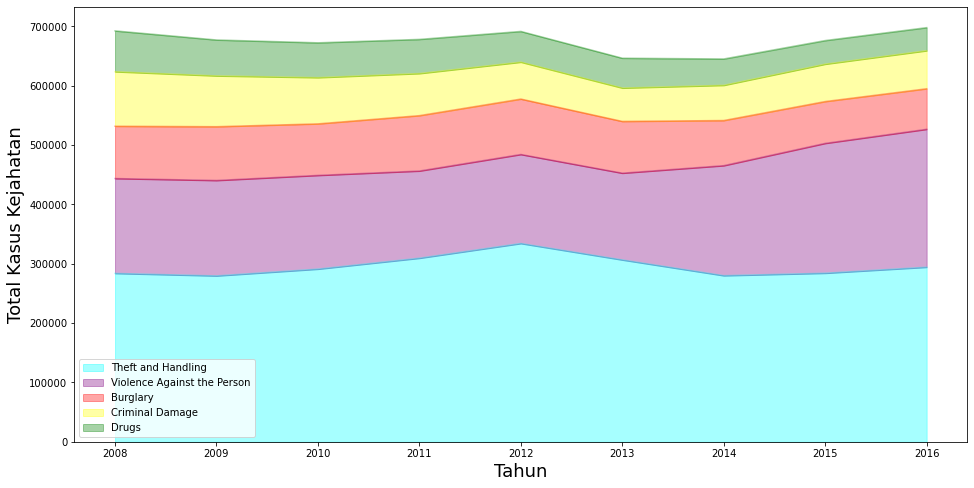

In [29]:
df_crime = df2[:5][years].T
df_crime.plot(
    kind='area',
    stacked=True,
    figsize=(16,8),
    alpha=0.35,
    color=('aqua','purple','red','yellow','green')
)

plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.legend(loc='best', fontsize=10)
plt.show()

Dari analisis diatas kita dapat mengetahui bahwa kasus yang sering terjadi di London selama 9 tahun. Peringkat pertama diduduki oleh kasus kejahatan pencurian(pencopetan) dengan lebih dari 60.000 kasus tiap tahunnya. Diikuti kejahatan kekerasan terhadap orang, diikuti pencurian barang di rumah, criminal damage, dan narkoba. banyaknya kasus pencurian diakibatkan karena banyaknya wisatawan yang berkunjung ke London, dan tingkat kewaspadaan dari wisatawan sedikit kurang. 

In [66]:
df_hist=df_crimlon[
    (df_crimlon['kategori_mayor'] == 'Criminal Damage') &
    ((df_crimlon['tahun'] == 2008) | (df_crimlon['tahun'] ==2009) | (df_crimlon['tahun'] == 2010 ))
].groupby(['wilayah','tahun'])['jumlah kasus'].sum().reset_index()
df_hist

wilayah  tahun  jumlah kasus
0   Barking and Dagenham   2008          2934
1   Barking and Dagenham   2009          2721
2   Barking and Dagenham   2010          2390
3                 Barnet   2008          2918
4                 Barnet   2009          2628
..                   ...    ...           ...
94            Wandsworth   2009          2721
95            Wandsworth   2010          2580
96           Westminster   2008          2599
97           Westminster   2009          2564
98           Westminster   2010          2385

[99 rows x 3 columns]

In [67]:
df_hist = pd.pivot_table(df_hist, values ='jumlah kasus', index ='wilayah', columns ='tahun')

In [71]:
df_hist.head(3)

tahun                 2008  2009  2010
wilayah                               
Barking and Dagenham  2934  2721  2390
Barnet                2918  2628  2715
Bexley                2893  2716  2201

[ 3  0  3  8 16 23 22 17  4  3]
[   0.   451.1  902.2 1353.3 1804.4 2255.5 2706.6 3157.7 3608.8 4059.9
 4511. ]


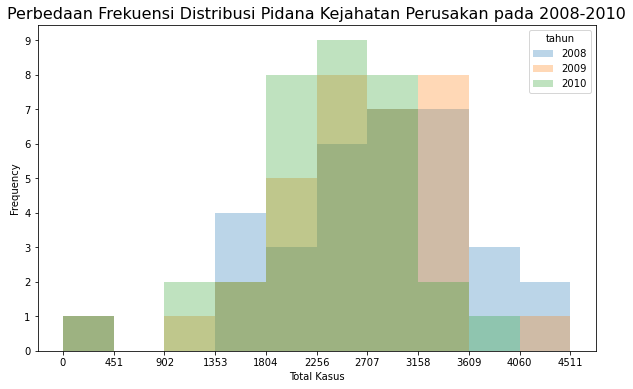

In [70]:

count, bin_edges = np.histogram(df_hist)
print(count)
print(bin_edges)
df_hist.plot(kind='hist', figsize=(10,6), xticks=bin_edges, yticks=[x for x in range(0,10)], alpha=0.3,)
plt.title('Perbedaan Frekuensi Distribusi Pidana Kejahatan Perusakan pada 2008-2010', fontsize=16) 
plt.xlabel('Total Kasus') 
plt.show() 

Dalam grafik histogram diatas dapat kita lihat untuk rata rata kasus kejahatan perusakan tercatat pada suatu wilayah di angka 1804 hingga 3609. Terdapat 1 wilayah untuk kasus terkecil pada kisaran 0-451 kasus.

Selanjutnya kita akan mencari tahu apa saja kasus kejahatan tertinggi dari kategori minor. Kita menggunakan pie chart untuk mengetahui hal tersebut 


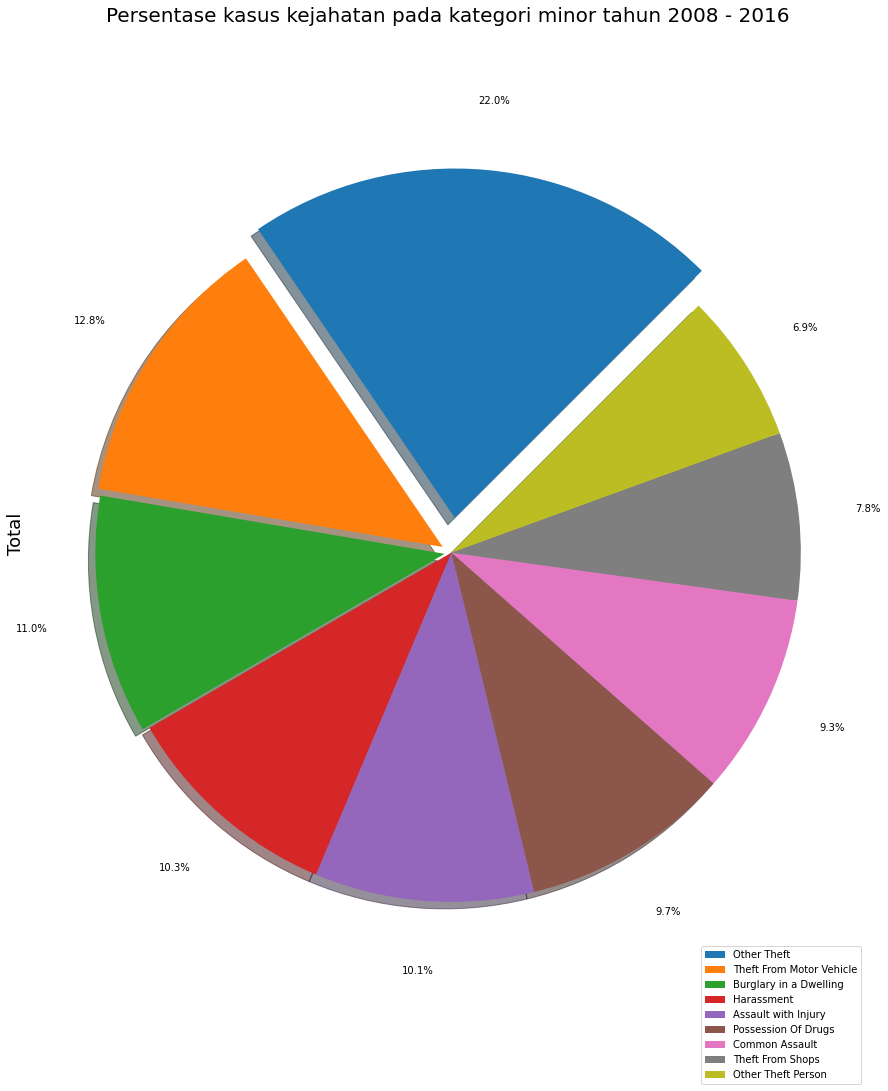

In [31]:
explode_list = [0.1, 0.03, 0.02, 0, 0, 0, 0, 0, 0]
df_pie = df5['Total'].head(9)
df_pie.plot(kind='pie',
            figsize=(15, 15),
            autopct='%1.1f%%',
            startangle=45,
            shadow=True,
            labels=None,         
            pctdistance=1.2,
            explode=explode_list 
            )


plt.title('Persentase kasus kejahatan pada kategori minor tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')


plt.legend(labels=df_pie.index.values, loc='best', bbox_to_anchor=(1, 0))

plt.show()

### Question 4
Bagaimana persebaran jumlah angka kriminalitas di kota London pada setiap bulan di setiap tahunnya ?

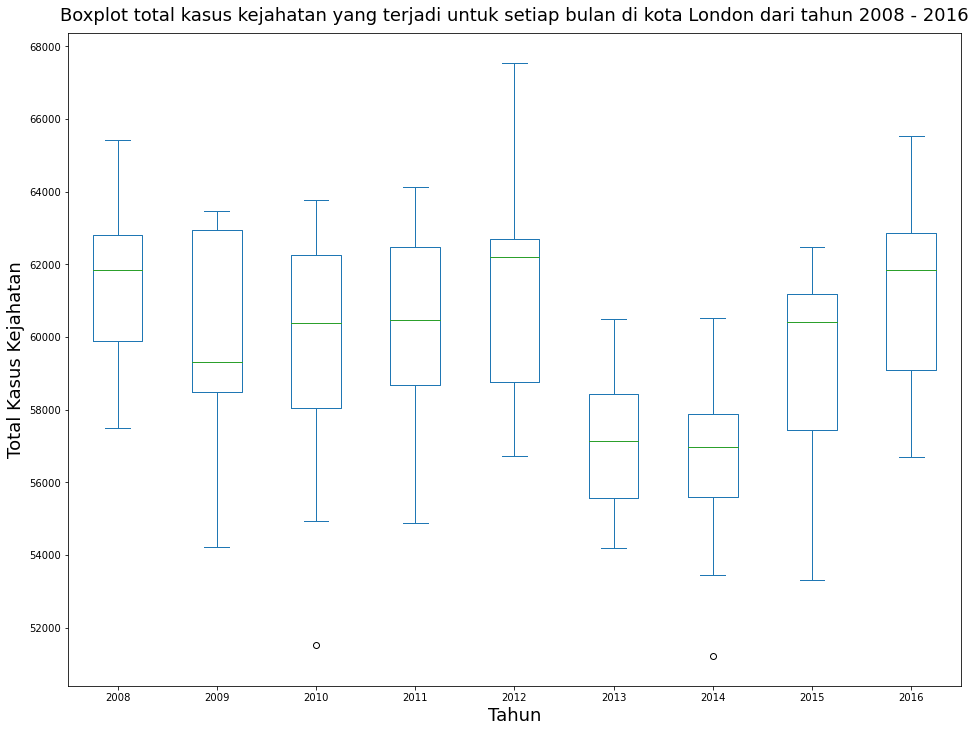

In [32]:
df3[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap bulan di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

Boxplot diatas menggambarkan rata rata total kasu kejahatan yang terjadi pada kota London tiap bulannya. Hal ini semakin menguatkan line plot yang kita buat diawal. pada Tahun 2010 dan 2014 terdapat outlier (pencilan), hal ini karena kasus pada bulan Desember 2010 dan Februari 2014 jumlah kejahatan nya tercatat dibawah 52.000 kasus.

### Scatter Plots
Kita akan melihat persebaran kejahatan untuk Theft and Handling pada Kota London

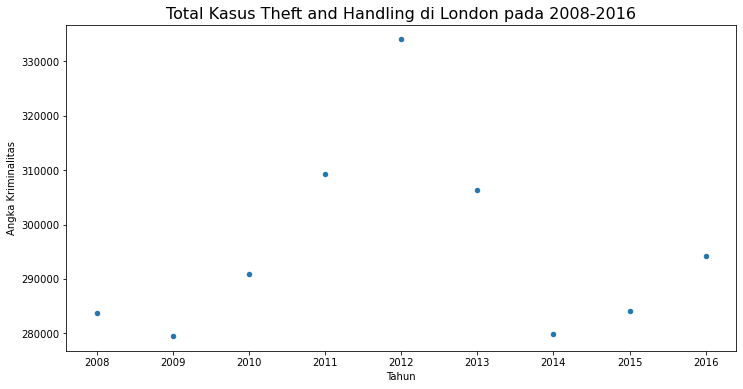

In [94]:
#ambil data
theft_tahun = df_crimlon[df_crimlon['kategori_mayor'] == 'Theft and Handling'].groupby('tahun')['jumlah kasus'].sum().reset_index()

#plot scatter
theft_tahun.plot(kind='scatter', x='tahun', y='jumlah kasus', figsize=(12,6))
plt.title('Total Kasus Theft and Handling di London pada 2008-2016', fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Angka Kriminalitas')

plt.show()

### WordClouds

Kita ingin mencari kota mana yang banyak terjadi pencurian dari motor dengan menggunakan wordclouds

In [73]:
#kita membuat data baru untuk kejahatan pencurian dari motor
crime_theftm = df_crimlon[
    df_crimlon['kategori_minor'] == 'Theft From Motor Vehicle'
].groupby(['wilayah'])[['jumlah kasus']].sum()

In [81]:
kata_wilayah = '' 

for idx, val in zip(crime_theftm.index.values, crime_theftm['jumlah kasus']): 
    split_str = idx.split(' ') 
    
    if len(split_str) > 1:
        
        idx = ''.join(split_str)

    kata_wilayah += (idx + ' ') * val

In [82]:
kata_wilayah

'BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandD

In [87]:
wordcloud = WordCloud(background_color='black', collocations=False, width=1000, height=500).generate(kata_wilayah)

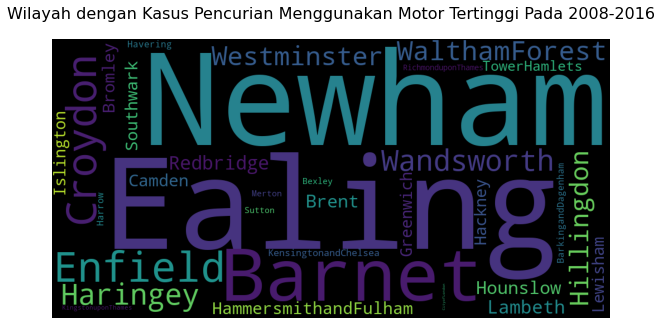

In [88]:
plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud)
plt.title('Wilayah dengan Kasus Pencurian Menggunakan Motor Tertinggi Pada 2008-2016', fontsize=16, pad=20)
plt.axis('off')
plt.show()

### Folium Maps

In [100]:
#mengambil geojson london
london_borough = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

#membuat map london dengan folium
london_map = folium.Map(location=[51.507359, -0.136439], zoom_start=10)


wilayah = df_hist.reset_index()[['wilayah', 2010]]

london_map.choropleth(
    geo_data=london_borough,
    data=wilayah,
    columns=['wilayah', 2010],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Damage in London 2010'
)

#panggil map choropleth
london_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Conclusion

Dari visualisasi data kriminalitas Kota London tahun 2008-2016 diatas kita dapat menarik beberapa hasil kesimpulan sebagai berikut :
1. Total dari 13 Juta Kejahatan yang terjadi pada Kota London, paling sering terjadi pada wilayah Westminster. Tercatat 455.028 Kasus terjadi dalam kurun waktu 2008-2016.
2. Kejahatan yang paling sering terjadi adalah kejahatan pencurian.
3. Kasus kejahatan Yang terjadi di Kota Londo turun cukup drastis pada tahun 2013 dan 2014. Tahun 2015 dan 2016 Angka Kejahatan kembali naik.
4. Wilayah yang sering terjadi pencurian menggunakan motor adalah wilayah Ealing dan Newham, disusul Barnet dan Enfield.